## Capstone Analytic Report and Research Proposal

#### Content

I have choosen a data taken from the DP03 and DP05 tables of the 2015 and 2017 American Community Survey 5-year estimates.  The full dataset and additional data can be found at the American Factfinder [website](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml).  I used the following two data files: 

1. `acs2015_county_data.csv`
2. `acs2017_county_data.csv`

The two files have same structure, with just a small difference in the name of the id column (CensusId vs CountyId) and the name of the citizen column(Citizen vs VotingAgeCitizen).  These are county datasets. Counties are political subdivisions, and the boundaries of some have been set for centuries.  

The Census Bureau updates the estimates every year.

#### Acknowledgements

The data here was collected by the U.S. Census Bureau.  As a product of the U.S. Federal government, this is not subject to copyright within the U.S.

These datasets were retrieved from the Kaggler MuonNeutrino, who collected them and created the [Kaggle dataset](https://www.kaggle.com/muonneutrino/us-census-demographic-data/data). 

#### Inspiration

I chose this dataset as it provided plenty of data to play with and allows me to practice my new skills. I have heard about different aspects of the United States population, but how many are based completely on data and how many are heresay. I chose the 2015 and 2017 dataset to compare and see what changes have occurred within a two year period.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
# 2015 Census Data
df15 = pd.read_csv('acs2015_county_data.csv', index_col=None)

# 2017 Census Data
df17 = pd.read_csv('acs2017_county_data.csv', index_col=None)

In [3]:
df15.head(5)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


Since there are 37 columns of data, I decided narrowing down what I am working with would be more efficient.  I am removing counties, columns that have percentages, and Puerto Rico.  I chose to remove columns with percentages as my three questions will be focusing on totals rather than percentages at this time. I also feel that I would not be able to properly show the differences, such as the differences in race, due to large differences from one county to another in a state.  I determined this after seeing the first few rows of counties in Alabama and seeing the distinctive changes in race.

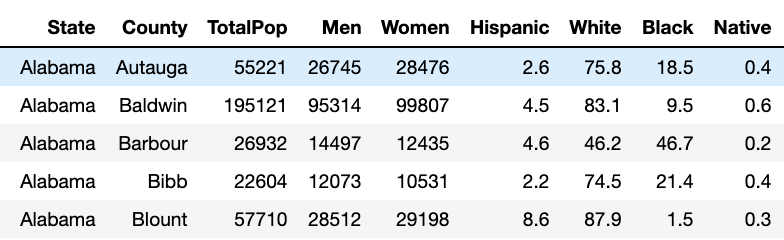

In [4]:
# Removing counties and consolidating the data by grouping per state to the 2015 dataset.
state15 = df15.groupby(by='State').sum()
# Resetting index to prevent 'State from being a row index'
state15 = state15.reset_index(drop=False)

#Removing columns that have percentages as I have plenty with whole numbers to explore.
state15 = state15.drop(columns=['Hispanic','White','Black','Native','Asian','Pacific',
                                'Poverty','ChildPoverty','Professional','Service','Office',
                                'Construction','Production','Drive','Carpool', 'Transit',
                                'Walk', 'OtherTransp','WorkAtHome','PrivateWork','PublicWork',
                                'SelfEmployed','FamilyWork','Unemployment'])

# Removing Puerto Rico from 2015 dataset
state15 = state15[state15.State != 'Puerto Rico']

state15.head()

,State,CensusId,TotalPop,Men,Women,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed
0,Alabama,71489,4830620,2341093,2489527,3620994,2544200.0,150773.0,1392323,68996,1737.3,2022325
1,Alaska,62340,733375,384160,349215,523946,1861716.0,156116.0,879656,65557,325.6,351108
2,Arizona,60208,6641928,3299088,3342840,4526594,648783.0,28390.0,315788,10928,325.8,2813406
3,Arkansas,380625,2958208,1451913,1506295,2164083,2746986.0,194270.0,1505402,93549,1737.6,1256081
4,California,351364,38421464,19087135,19334329,24280349,3248763.0,130043.0,1618351,54936,1448.0,17246360


In [5]:
# Removing counties and consolidating the data by grouping per state to the 2017 dataset.
state17 = df17.groupby(by='State').sum()
# Resetting index to prevent 'State from being a row index'
state17 = state17.reset_index(drop=False)

#Removing columns that have percentages as I have plenty with whole numbers to explore.
state17 = state17.drop(columns=['Hispanic','White','Black','Native','Asian','Pacific',
                                'Poverty','ChildPoverty','Professional','Service','Office',
                                'Construction','Production','Drive','Carpool', 'Transit',
                                'Walk', 'OtherTransp','WorkAtHome','PrivateWork',
                                'PublicWork','SelfEmployed','FamilyWork','Unemployment'])

#Removing Puerto Rico from 2017 dataset
state17 = state17[state17.State != 'Puerto Rico']

state17.head()

,State,CountyId,TotalPop,Men,Women,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed
0,Alabama,71489,4850771,2350806,2499965,3651914,2698184,168384,1486093,80088,1754.7,2055509
1,Alaska,62340,738565,386319,352246,530553,1926338,159524,918446,67885,324.8,354045
2,Arizona,60208,6809946,3385055,3424891,4690177,687250,32399,340683,12078,325.5,2953891
3,Arkansas,380625,2977944,1461651,1516293,2183895,2926881,214450,1608698,107819,1726.0,1276536
4,California,351364,38982847,19366579,19616268,24970109,3540712,129479,1764156,59283,1480.6,17993915


Since U.S. regions are referred to in many places from new articles, books, maps, etc, I decided that would be helpful in seeing the big picture easier.

I have created State/Region data dict per [Wikipedia](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States).  I will add a column to the datasets for `Region` to allow me to do queries by region.

In [6]:
region = {"Connecticut": 'Northeast',"Maine": 'Northeast',"Massachusetts": 'Northeast',
           "New Hampshire": 'Northeast', "Rhode Island": 'Northeast',"Vermont": 'Northeast',
           "New Jersey": 'Northeast',"New York": 'Northeast', "Pennsylvania": 'Northeast',
           "Indiana": 'Midwest',"Illinois": 'Midwest',"Michigan": 'Midwest',"Ohio": 'Midwest',
           "Wisconsin": 'Midwest',"Iowa": 'Midwest',"Kansas": 'Midwest',"Minnesota": 'Midwest',
           "Missouri": 'Midwest',"Nebraska": 'Midwest',"North Dakota": 'Midwest',
           "South Dakota": 'Midwest',"Delaware": 'South',"District of Columbia": 'South',
           "Florida": 'South',"Georgia": 'South',"Maryland": 'South',"North Carolina": 'South',
           "South Carolina": 'South',"Virginia": 'South',"West Virginia": 'South',"Alabama": 'South',
           "Kentucky": 'South',"Mississippi": 'South',"Tennessee": 'South',"Arkansas": 'South',
           "Louisiana": 'South',"Oklahoma": 'South',"Texas": 'South',"Arizona": 'West',
           "Colorado": 'West',"Idaho": 'West',"New Mexico": 'West',"Montana": 'West',
           "Utah": 'West',"Nevada": 'West',"Wyoming": 'West',"Alaska": 'West',"California": 'West',
            "Hawaii": 'West',"Oregon": 'West',"Washington": 'West'}

In [7]:
# Adding Region column to 2015 dataset.
state15["Region"] = state15["State"].replace(region)

state15.head(5)

,State,CensusId,TotalPop,Men,Women,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed,Region
0,Alabama,71489,4830620,2341093,2489527,3620994,2544200.0,150773.0,1392323,68996,1737.3,2022325,South
1,Alaska,62340,733375,384160,349215,523946,1861716.0,156116.0,879656,65557,325.6,351108,West
2,Arizona,60208,6641928,3299088,3342840,4526594,648783.0,28390.0,315788,10928,325.8,2813406,West
3,Arkansas,380625,2958208,1451913,1506295,2164083,2746986.0,194270.0,1505402,93549,1737.6,1256081,South
4,California,351364,38421464,19087135,19334329,24280349,3248763.0,130043.0,1618351,54936,1448.0,17246360,West


In [8]:
# 2015 Total Population per Region
df_region15 = state15[['Region','State','TotalPop']].groupby(by='Region')[['TotalPop']].sum()
df_region15 = df_region15.reset_index(drop=False)
df_region15.sort_values(['TotalPop'], ascending=False).head()

,Region,TotalPop
2,South,118575377
3,West,74403726
0,Midwest,67546398
1,Northeast,55989520


In [9]:
# 2015 Total Population for Top Ten States
df_state15 = state15[['State','TotalPop']].groupby(by='State')[['TotalPop']].sum()
df_state15 = df_state15.reset_index(drop=False)
df_state15.sort_values(['TotalPop'], ascending=False).head(10)

,State,TotalPop
4,California,38421464
43,Texas,26538614
32,New York,19673174
9,Florida,19645772
13,Illinois,12873761
38,Pennsylvania,12779559
35,Ohio,11575977
10,Georgia,10006693
22,Michigan,9900571
33,North Carolina,9845333


In [10]:
# 2015 Median Income for Top Ten States
df_income15 = df15[['State','Income']].groupby(by='State')[['Income']].median()
df_income15 = df_income15.reset_index(drop=False)
df_income15.sort_values(['Income'], ascending=False).head(10)

,State,Income
8,District of Columbia,70848.0
30,New Jersey,70471.0
40,Rhode Island,69526.0
6,Connecticut,69228.0
20,Maryland,66745.5
11,Hawaii,66250.0
1,Alaska,64222.0
21,Massachusetts,63736.5
29,New Hampshire,59246.5
51,Wyoming,56569.0


In [11]:
# Adding Region column to 2017 dataset.
state17["Region"] = state17["State"].replace(region)
state17.head()

,State,CountyId,TotalPop,Men,Women,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed,Region
0,Alabama,71489,4850771,2350806,2499965,3651914,2698184,168384,1486093,80088,1754.7,2055509,South
1,Alaska,62340,738565,386319,352246,530553,1926338,159524,918446,67885,324.8,354045,West
2,Arizona,60208,6809946,3385055,3424891,4690177,687250,32399,340683,12078,325.5,2953891,West
3,Arkansas,380625,2977944,1461651,1516293,2183895,2926881,214450,1608698,107819,1726.0,1276536,South
4,California,351364,38982847,19366579,19616268,24970109,3540712,129479,1764156,59283,1480.6,17993915,West


In [12]:
# 2017 Total Population per Region
df_region17 = state17[['Region','State','TotalPop']].groupby(by='Region')[['TotalPop']].sum()
df_region17 = df_region17.reset_index(drop=False)
df_region17.sort_values(['TotalPop'], ascending=False).head()

,Region,TotalPop
2,South,121057103
3,West,75821560
0,Midwest,67850273
1,Northeast,56275471


In [13]:
# 2017 Total Population for Top Ten States
df_state17 = state17[['State','TotalPop']].groupby(by='State')[['TotalPop']].sum()
df_state17 = df_state17.reset_index(drop=False)
df_state17.sort_values(['TotalPop'], ascending=False).head(10)

,State,TotalPop
4,California,38982847
43,Texas,27419612
9,Florida,20278447
32,New York,19798228
13,Illinois,12854526
38,Pennsylvania,12790505
35,Ohio,11609756
10,Georgia,10201635
33,North Carolina,10052564
22,Michigan,9925568


In [14]:
# 2017 Median Income for Top Ten States 
df_income17 = df17[['State','Income']].groupby(by='State')[['Income']].median().round()
df_income17 = df_income17.reset_index(drop=False)
df_income17.sort_values(['Income'], ascending=False).head(10)

,State,Income
8,District of Columbia,77649.0
30,New Jersey,75500.0
40,Rhode Island,74630.0
6,Connecticut,73187.0
11,Hawaii,72330.0
20,Maryland,71163.0
21,Massachusetts,67792.0
1,Alaska,66607.0
29,New Hampshire,63435.0
34,North Dakota,58767.0


In [15]:
# Total Population for 2015 & 2017 datasets
print(df15[['TotalPop']].sum())

print(df17[['TotalPop']].sum())

TotalPop    320098094
dtype: int64
TotalPop    324473370
dtype: int64


## 1st Question:  Did the Population in the U.S. increase between 2015 and 2017?

I decided this question is an important question when looking at these datasets.  While I believe everyone would like to believe that the population increases each year, we do have to take into account that some generations conceive more babies than others, diseases that may have a large impact, natural catastrophes, and various other factors.  

In the histogram below, I colored the population for 2015 as purple and 2017 as green.  As you can see in there have been increases in the population and a few decreases.  Without more detailed information we can only speculate to the reasons for increases and decreases (Moving from one state to another, deaths, etc).

I did run the numbers for the average total of population for both years:

### 2015: `320,098,094` and 2017: `324,473,370`

There was a overall increase of `4,375,276` to the population from 2015 to 2017.

<function matplotlib.pyplot.show(*args, **kw)>

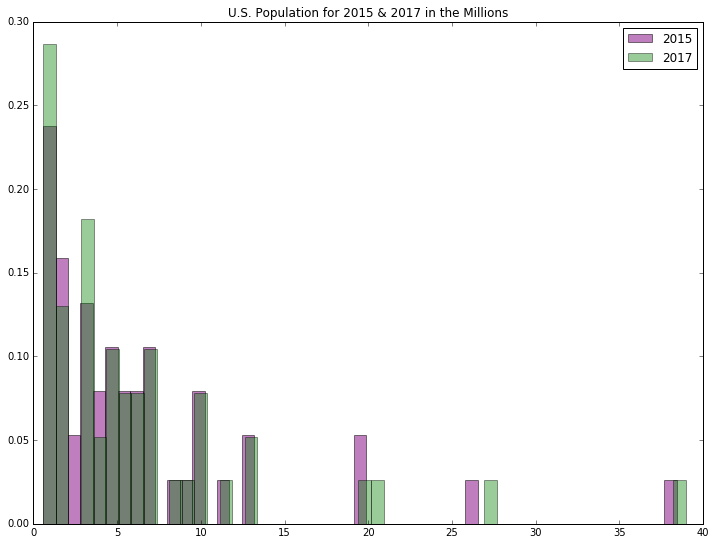

In [16]:
#Hist of Pop
s15 = state15['TotalPop'].divide(1000000)
s17 = state17['TotalPop'].divide(1000000)

plt.figure(figsize=(12,9))
plt.hist(s15, bins=51, color='purple', density=True, alpha=.5, label='2015')
plt.hist(s17,bins=51, color='green', density=True, alpha=.4, label='2017')
plt.title('U.S. Population for 2015 & 2017 in the Millions')
plt.legend(loc='upper right')

plt.show

## 2nd Question: Which regions in the United States have the largest populations?

I created two bubble chart where the population of each state is shown by the size of the bubble.  As you can see by the bubble chart the West region has an individual state that stands out in size of population.

As you can see from the comparisons below California and Texas are the largest states in regards to population with New York and Florida not far behind Texas.  The top ten states remain the same from 2015 to 2017.  The only changes are the 3rd and 4th rank states, New York and Florida, and the 9th and 10th rank states, Michigan and North Carolina, which switch places.  

It is interesting that in the West Region, that California is significantly ahead of all the other states in the West region in total population per state. Also interesting is that the South Region has a larger population in total than the other regions.   

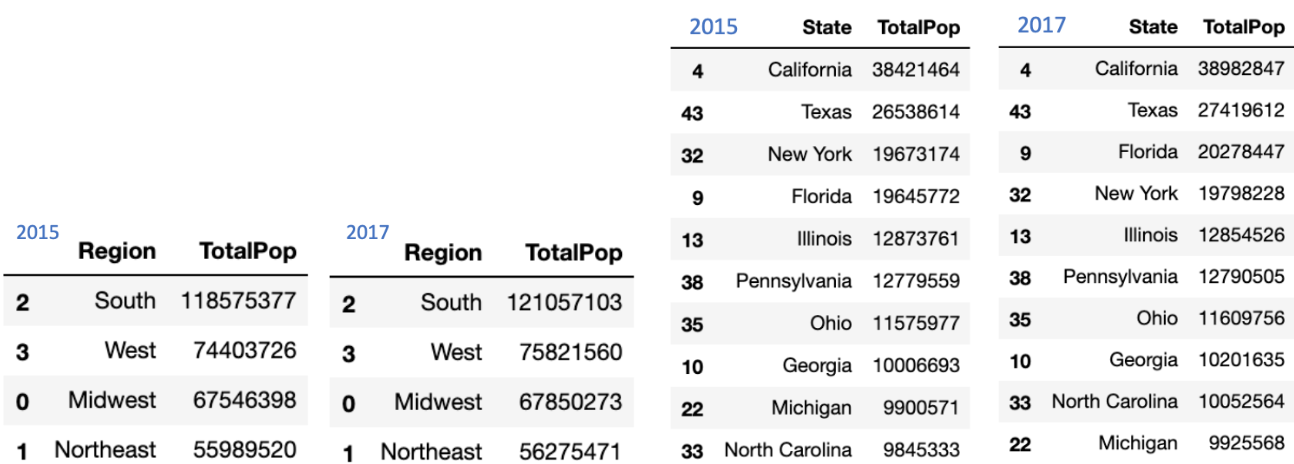

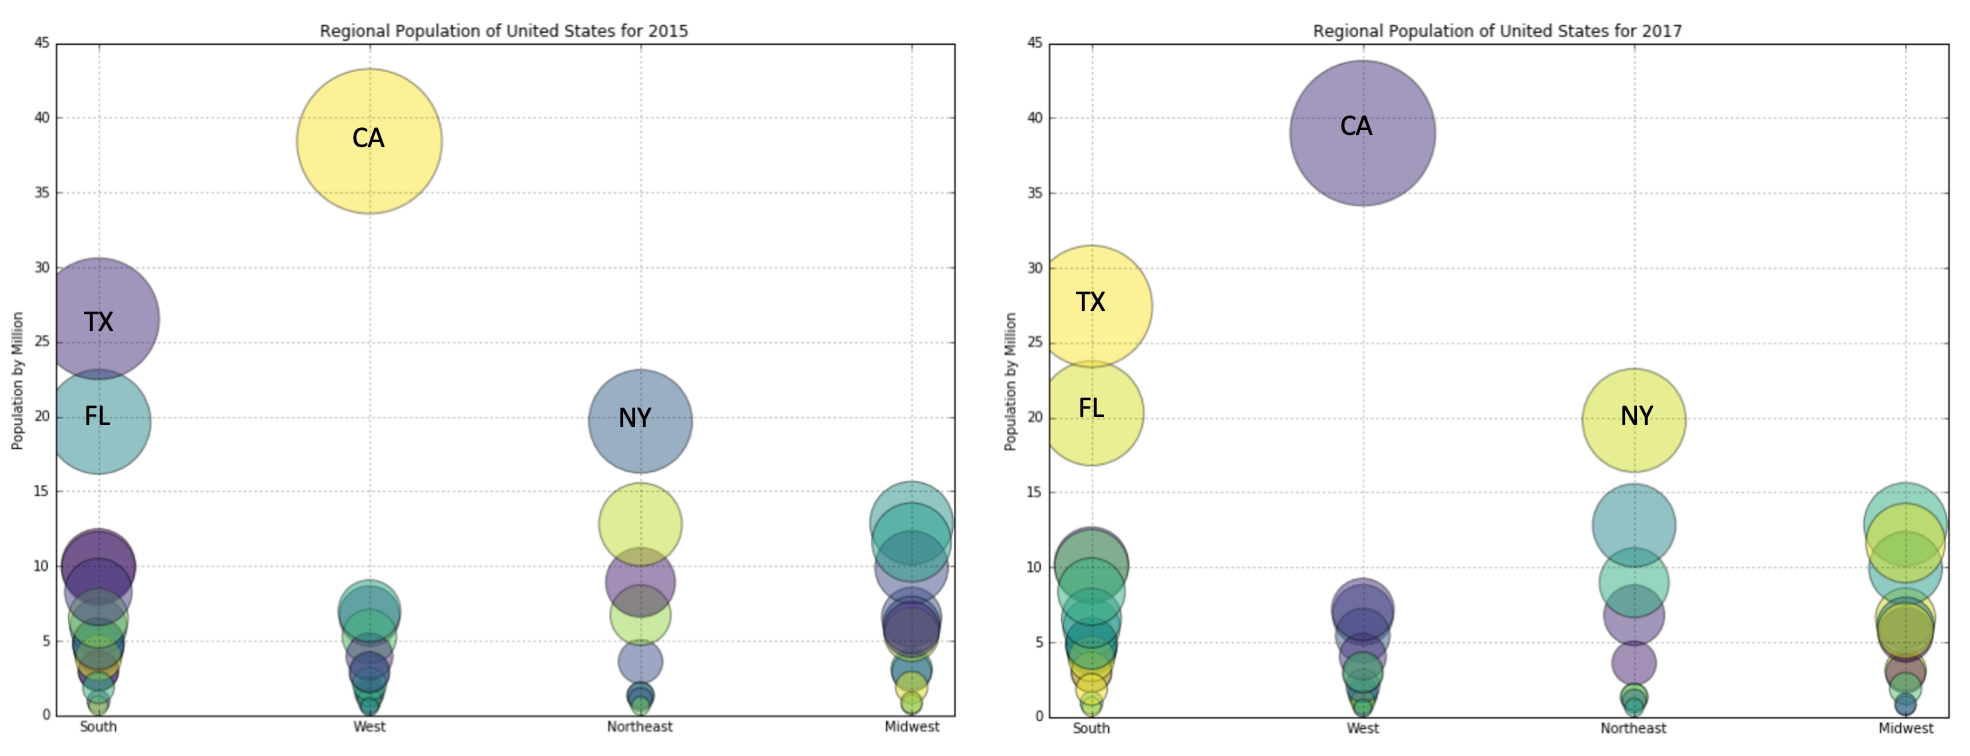

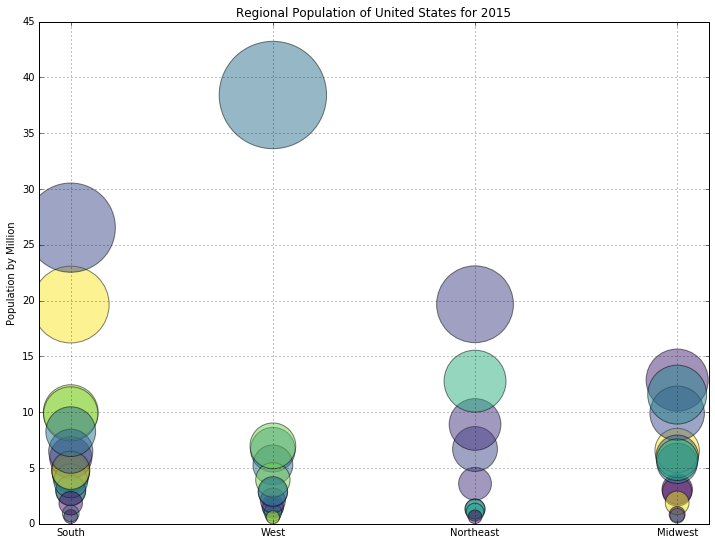

In [17]:
# Creating bubble chart for population per Region for 2015 dataset
sr15 = state15['Region']
st15 = state15['TotalPop'].divide(1000000) # Divide by 1,000,000 for easier plotting
colors = np.random.rand(51)

plt.figure(figsize=(12,9))
plt.scatter(sr15, st15, s=(st15*300), #s=np.sqrt(y*5), 
            c=colors, cmap='viridis', alpha=0.5)

# Add titles (main and on axis)
plt.ylim(0, 45)
plt.grid(True)
plt.ylabel('Population by Million')
plt.title("Regional Population of United States for 2015")

plt.show()

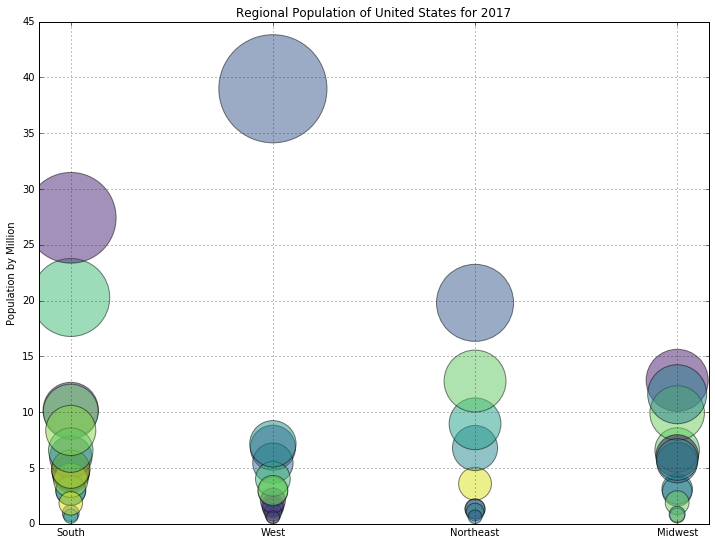

In [18]:
# Creating bubble chart for population per Region for 2017 dataset
sr17 = state17['Region']
st17 = state17['TotalPop'].divide(1000000) # Divide by 1,000,000 for easier plotting
colors = np.random.rand(51)

plt.figure(figsize=(12,9))
plt.scatter(sr17, st17, s=(st17*300), #s=np.sqrt(y*7), 
            c=colors, cmap='viridis', alpha=0.5)

# Add titles (main and on axis)
plt.ylim(0, 45)
plt.grid(True)
plt.ylabel('Population by Million')
plt.title("Regional Population of United States for 2017")

plt.show()

## 3rd Question: Is there a difference of income in the states with the largest populations?

I thought this was very interesting.  California and New York are known for being expensive places to live and large populations. However when taking the median household income per state, neither are in the top ten states.  I would speculate that there are enough smaller cities to impact the median state income, but I would need more data to verify that thought.  The one thing that stands out is none of these states are in the top ten in size of population.  Perhaps having a larger population affects the median income.  I think using a heat map to compare these at a county level would be helpful in determining if there are outliers in the data skewing these results.

Another point of interest, the top ten states are identical with the exception of the 10th rank which change from Wyoming to North Dakota.  I would not have considered either of these states to be in the top ten on median household income.  I would definitely like to see the factor(s) that is affecting the income in those two states to put them in 10th place.  

The top four states are the same and are smaller states in territory size, so perhaps have a small area with more people increase the median income for the state. Though having Alaska and Wyoming on the list makes that theory wrong.  

There are quite a few interesting points where looking deeper into the data would provide better insight on these differences.

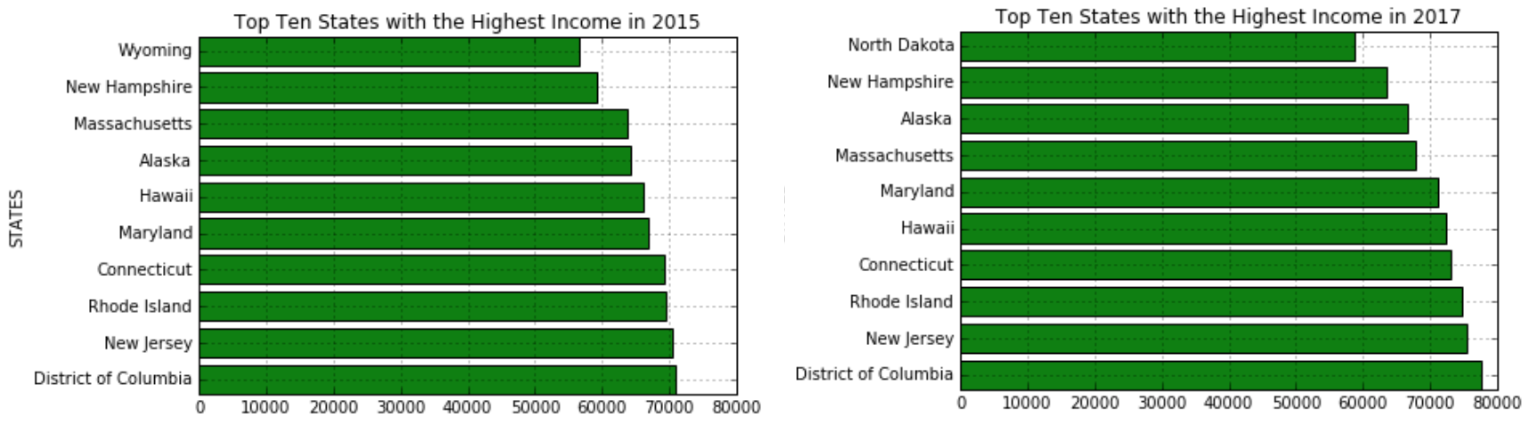

In [19]:
# Top ten states Median Household income levels for 2015
df_income15[['State','Income']].groupby(by='State')[['Income']].median()

topten_income15= df_income15.nlargest(10,'Income','first')
topten_income15 = topten_income15.reset_index(drop=False)

topten_income15.head(10)

,index,State,Income
0,8,District of Columbia,70848.0
1,30,New Jersey,70471.0
2,40,Rhode Island,69526.0
3,6,Connecticut,69228.0
4,20,Maryland,66745.5
5,11,Hawaii,66250.0
6,1,Alaska,64222.0
7,21,Massachusetts,63736.5
8,29,New Hampshire,59246.5
9,51,Wyoming,56569.0


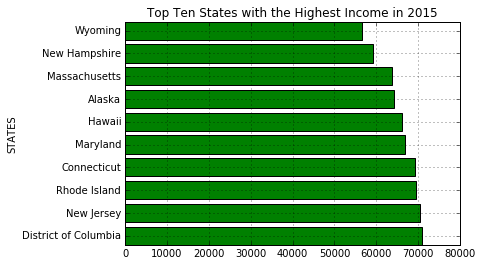

In [20]:
# Creating bar chart for median household income for top ten states for 2015 dataset
i = topten_income15['State']
j = topten_income15['Income']

plt.barh(i, j, color='Green')

# Add titles (main and on axis)
plt.grid(True)
plt.ylabel('STATES')
plt.title("Top Ten States with the Highest Income in 2015")

plt.show()

In [21]:
# Top ten states income levels for 2015
df_income17[['State','Income']].groupby(by='State')[['Income']].median()

topten_income17= df_income17.nlargest(10,'Income','first')
topten_income17 = topten_income17.reset_index(drop=False)

topten_income17.head(10)

,index,State,Income
0,8,District of Columbia,77649.0
1,30,New Jersey,75500.0
2,40,Rhode Island,74630.0
3,6,Connecticut,73187.0
4,11,Hawaii,72330.0
5,20,Maryland,71163.0
6,21,Massachusetts,67792.0
7,1,Alaska,66607.0
8,29,New Hampshire,63435.0
9,34,North Dakota,58767.0


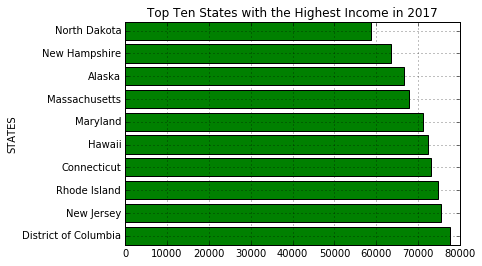

In [22]:
# Creating bar chart for income for top ten states for 2017 dataset
k = topten_income17['State']
l = topten_income17['Income']

plt.barh(k, l, color='Green')

# Add titles (main and on axis)
plt.grid(True)
plt.ylabel('STATES')
plt.title("Top Ten States with the Highest Income in 2017")

plt.show()

### Further Research

I would like to dig further into how my expectations of the the top ten states income did not include some of the top ten states in population.  In particular, I was expecting California and New York to be in the top ten states income list.  Perhaps digging down to the county level will show what the differences are and why they are making such a difference between population and income.  I think bringing in a slightly different dataset showing cities, instead of counties might be helpful.  Using geomapping will provide a better visualization in showing the differences between the different areas of the United States.  Also possibly using NLP to find new articles from 2015 and 2017 that mention population and income may provide insight to events that occurred to cause changes in the total population of the states.